# EECS 3401 Project 

## Filght Status Prediction


#### Can we predict if the flight is arriving late?

Dataset Overview:

The dataset used in this analysis contains information on thousands of flights, including details such as departure delays, arrival delays, airlines, airports, and more. We explore the dataset, preprocess the data, engineer relevant features, and train several machine learning models to predict flight delays.

Note: Selection of ATL for Model Training

Due to computational constraints and ATL's status as one of the world's busiest airports, our study exclusively trains models on data from Hartsfield-Jackson Atlanta International Airport. This focused approach ensures efficient use of resources while capturing diverse flight scenarios, enhancing the accuracy of our predictive models for flight delays and arrivals.

In [50]:
import zipfile
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns



In [51]:
# Specify the path to your compressed folder and the CSV file inside
compressed_folder_path = 'Combined_Flights_2022.zip'
csv_file_name = 'Combined_Flights_2022.csv'

# Extract the contents of the ZIP file
with zipfile.ZipFile(compressed_folder_path, 'r') as zip_ref:
    zip_ref.extractall('path/to/extracted/folder')

# Create the full path to the extracted CSV file
csv_file_path = f'path/to/extracted/folder/{csv_file_name}'

# Read the CSV file using pandas
df = pd.read_csv(csv_file_path)
#df = pd.read_csv('Combined_Flights_2022.csv')
df.head(10)

,FlightDate,Airline,Origin,Dest,Cancelled,Diverted,CRSDepTime,DepTime,DepDelayMinutes,DepDelay,...,WheelsOff,WheelsOn,TaxiIn,CRSArrTime,ArrDelay,ArrDel15,ArrivalDelayGroups,ArrTimeBlk,DistanceGroup,DivAirportLandings
0,2022-04-04,"Commutair Aka Champlain Enterprises, Inc.",GJT,DEN,False,False,1133,1123.0,0.0,-10.0,...,1140.0,1220.0,8.0,1245,-17.0,0.0,-2.0,1200-1259,1,0
1,2022-04-04,"Commutair Aka Champlain Enterprises, Inc.",HRL,IAH,False,False,732,728.0,0.0,-4.0,...,744.0,839.0,9.0,849,-1.0,0.0,-1.0,0800-0859,2,0
2,2022-04-04,"Commutair Aka Champlain Enterprises, Inc.",DRO,DEN,False,False,1529,1514.0,0.0,-15.0,...,1535.0,1622.0,14.0,1639,-3.0,0.0,-1.0,1600-1659,2,0
3,2022-04-04,"Commutair Aka Champlain Enterprises, Inc.",IAH,GPT,False,False,1435,1430.0,0.0,-5.0,...,1446.0,1543.0,4.0,1605,-18.0,0.0,-2.0,1600-1659,2,0
4,2022-04-04,"Commutair Aka Champlain Enterprises, Inc.",DRO,DEN,False,False,1135,1135.0,0.0,0.0,...,1154.0,1243.0,8.0,1245,6.0,0.0,0.0,1200-1259,2,0
5,2022-04-04,"Commutair Aka Champlain Enterprises, Inc.",DEN,TUL,False,False,955,952.0,0.0,-3.0,...,1017.0,1234.0,4.0,1240,-2.0,0.0,-1.0,1200-1259,3,0
6,2022-04-04,"Commutair Aka Champlain Enterprises, Inc.",IAH,LCH,False,False,2139,2136.0,0.0,-3.0,...,2147.0,2213.0,5.0,2231,-13.0,0.0,-1.0,2200-2259,1,0
7,2022-04-04,"Commutair Aka Champlain Enterprises, Inc.",TYS,IAH,False,False,1129,1117.0,0.0,-12.0,...,1139.0,1255.0,16.0,1306,5.0,0.0,0.0,1300-1359,4,0
8,2022-04-04,"Commutair Aka Champlain Enterprises, Inc.",IAH,AEX,False,False,1424,1414.0,0.0,-10.0,...,1430.0,1507.0,6.0,1524,-11.0,0.0,-1.0,1500-1559,1,0
9,2022-04-04,"Commutair Aka Champlain Enterprises, Inc.",IAH,MOB,False,False,954,947.0,0.0,-7.0,...,1004.0,1104.0,6.0,1121,-11.0,0.0,-1.0,1100-1159,2,0


<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Extracting and Reading a CSV File from a ZIP Archive</title>
</head>
<body>
    <header>
        <h1>Exploring the columns </h1>
    </header>
    <ul>
    <li>Number of columns show us the features of our dataset</li>
    </ul>
</body>
</html>


In [52]:
columns = df.columns
len(columns)

61

In [53]:
columns

Index(['FlightDate', 'Airline', 'Origin', 'Dest', 'Cancelled', 'Diverted',
       'CRSDepTime', 'DepTime', 'DepDelayMinutes', 'DepDelay', 'ArrTime',
       'ArrDelayMinutes', 'AirTime', 'CRSElapsedTime', 'ActualElapsedTime',
       'Distance', 'Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek',
       'Marketing_Airline_Network', 'Operated_or_Branded_Code_Share_Partners',
       'DOT_ID_Marketing_Airline', 'IATA_Code_Marketing_Airline',
       'Flight_Number_Marketing_Airline', 'Operating_Airline',
       'DOT_ID_Operating_Airline', 'IATA_Code_Operating_Airline',
       'Tail_Number', 'Flight_Number_Operating_Airline', 'OriginAirportID',
       'OriginAirportSeqID', 'OriginCityMarketID', 'OriginCityName',
       'OriginState', 'OriginStateFips', 'OriginStateName', 'OriginWac',
       'DestAirportID', 'DestAirportSeqID', 'DestCityMarketID', 'DestCityName',
       'DestState', 'DestStateFips', 'DestStateName', 'DestWac', 'DepDel15',
       'DepartureDelayGroups', 'DepTimeBlk', 'TaxiOu

In [54]:
# Getting info about the dataset
df.info

<bound method DataFrame.info of          FlightDate                                    Airline Origin Dest  \
0        2022-04-04  Commutair Aka Champlain Enterprises, Inc.    GJT  DEN   
1        2022-04-04  Commutair Aka Champlain Enterprises, Inc.    HRL  IAH   
2        2022-04-04  Commutair Aka Champlain Enterprises, Inc.    DRO  DEN   
3        2022-04-04  Commutair Aka Champlain Enterprises, Inc.    IAH  GPT   
4        2022-04-04  Commutair Aka Champlain Enterprises, Inc.    DRO  DEN   
...             ...                                        ...    ...  ...   
4078313  2022-03-31                          Republic Airlines    MSY  EWR   
4078314  2022-03-17                          Republic Airlines    CLT  EWR   
4078315  2022-03-08                          Republic Airlines    ALB  ORD   
4078316  2022-03-25                          Republic Airlines    EWR  PIT   
4078317  2022-03-07                          Republic Airlines    EWR  RDU   

         Cancelled  Diverted  C

# Number of Rows

In [55]:
# total no of rows in the dataset
len(df.index)

4078318

<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Rows</title>
</head>
<body>
    <header>
        <h1>Exploring the rows </h1>
    </header>
    <ul>
    <li>Number of rows show us the samples of our dataset</li>
    <li>For example : Origin is the one of the features and the different cities in which the airport is located , these are our samples. </li>
    </ul>
</body>
</html> 


In [56]:
# Getting the airport codes 
origin_airtport_city = df['Origin'].unique()
origin_airtport_city

array(['GJT', 'HRL', 'DRO', 'IAH', 'DEN', 'TYS', 'MOB', 'LNK', 'BHM',
       'IAD', 'ECP', 'AEX', 'LFT', 'BTR', 'ABQ', 'BUF', 'ALB', 'HSV',
       'TUL', 'CPR', 'CRP', 'EWR', 'DCA', 'STL', 'CVG', 'RIC', 'PVD',
       'CLT', 'GSO', 'ERI', 'ORD', 'LEX', 'ABE', 'CAK', 'AVL', 'DAY',
       'CHO', 'ROA', 'PWM', 'LIT', 'MKE', 'BTV', 'OMA', 'GRB', 'MLI',
       'SDF', 'FNT', 'CHS', 'PIT', 'TVC', 'ATW', 'DLH', 'ROC', 'SPI',
       'HPN', 'MBS', 'CID', 'MYR', 'CAE', 'SGF', 'AVP', 'GRR', 'DSM',
       'CLE', 'PIA', 'MSN', 'MDT', 'SBN', 'MEM', 'ICT', 'SHV', 'XNA',
       'DIK', 'GPT', 'PNS', 'LRD', 'LCH', 'MFE', 'FLG', 'BRO', 'SAF',
       'PQI', 'ORF', 'LGA', 'SYR', 'RDU', 'ILM', 'IND', 'PHL', 'CMH',
       'SCE', 'ITH', 'JAX', 'OKC', 'JAN', 'GSP', 'TXK', 'ELP', 'MAF',
       'AUS', 'IDA', 'BNA', 'SAV', 'AMA', 'ATL', 'BDL', 'BLI', 'BOI',
       'BOS', 'BUR', 'BWI', 'BZN', 'COS', 'DAL', 'DTW', 'EUG', 'FAT',
       'FLL', 'GEG', 'HDN', 'HNL', 'HOU', 'ISP', 'ITO', 'KOA', 'LAS',
       'LAX', 'LBB',

<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Rows</title>
</head>
<body>
    <header>
        <h1>Exploring different airports </h1>
    </header>
    <ul>
    <li>Busiest airports</li>
    <li>Our dataset is very large , so we will be considering only the busiest airports for model training  </li>
    </ul>
</body>
</html> 


##### TOP 10 Busiest Airports 

In [57]:
# Getting the top 10 most busiest airports in USA for 2022
busiest_airports = df['Origin'].value_counts().nlargest(10)
busiest_airports

Origin
ATL    183697
ORD    172169
DFW    161218
DEN    158092
CLT    126088
LAX    111935
LGA    100260
SEA     98884
LAS     97674
PHX     96095
Name: count, dtype: int64

# Busiest Airports visualization

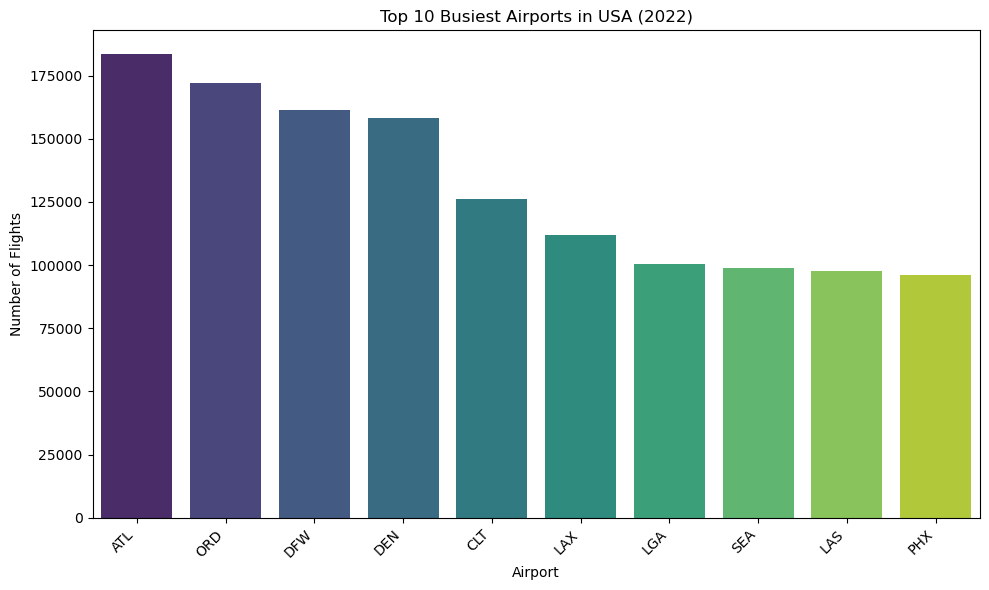

In [58]:
# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=busiest_airports.index, y=busiest_airports.values, palette='viridis')
plt.title('Top 10 Busiest Airports in USA (2022)')
plt.xlabel('Airport')
plt.ylabel('Number of Flights')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

------------------------ EDA Ends Here --------------------------

In [59]:
specific_origin_airport = ['ATL']  # Replace with the airport code you're interested in
df_filtered = df[df['Origin'].isin(specific_origin_airport)]
df_filtered.head()

,FlightDate,Airline,Origin,Dest,Cancelled,Diverted,CRSDepTime,DepTime,DepDelayMinutes,DepDelay,...,WheelsOff,WheelsOn,TaxiIn,CRSArrTime,ArrDelay,ArrDel15,ArrivalDelayGroups,ArrTimeBlk,DistanceGroup,DivAirportLandings
1855,2022-04-01,Southwest Airlines Co.,ATL,AUS,False,False,820,832.0,12.0,12.0,...,845.0,1000.0,4.0,1000,4.0,0.0,0.0,1000-1059,4,0
1856,2022-04-01,Southwest Airlines Co.,ATL,AUS,False,False,1440,1505.0,25.0,25.0,...,1516.0,1625.0,7.0,1615,17.0,1.0,1.0,1600-1659,4,0
1857,2022-04-01,Southwest Airlines Co.,ATL,AUS,False,False,1955,2105.0,70.0,70.0,...,2123.0,2232.0,5.0,2135,62.0,1.0,4.0,2100-2159,4,0
1858,2022-04-01,Southwest Airlines Co.,ATL,BNA,False,False,1510,1547.0,37.0,37.0,...,1601.0,1539.0,8.0,1510,37.0,1.0,2.0,1500-1559,1,0
1859,2022-04-01,Southwest Airlines Co.,ATL,BNA,False,False,820,819.0,0.0,-1.0,...,833.0,813.0,5.0,835,-17.0,0.0,-2.0,0800-0859,1,0


## Dropping Unwanted columns

These columns represent unique IDs and code which don't provide much value
in the training the model and are unrealated to the data analysis.

In [61]:
# List of columns to drop (IDs)
id_columns_to_drop = ['DOT_ID_Marketing_Airline', 'DOT_ID_Operating_Airline', 'OriginAirportID',
                      'OriginAirportSeqID', 'OriginCityMarketID', 'DestAirportID', 'DestAirportSeqID',
                      'DestCityMarketID', 'Flight_Number_Marketing_Airline', 'Flight_Number_Operating_Airline',
                      'IATA_Code_Marketing_Airline', 'IATA_Code_Operating_Airline', 'Tail_Number',
                      'Marketing_Airline_Network', 'Operated_or_Branded_Code_Share_Partners',
                   'OriginCityName', 'OriginState', 'DestCityName', 'DestState',
                      'OriginStateName','OriginStateFips','OriginWac'
                  ,'DestStateName','DestStateFips','DestWac','Operating_Airline']

# Drop ID columns from the DataFrame
df_filtered = df_filtered.drop(columns=id_columns_to_drop)

# Print data types of the remaining columns
print(df_filtered.dtypes)

FlightDate               object
Airline                  object
Origin                   object
Dest                     object
Cancelled                  bool
Diverted                   bool
CRSDepTime                int64
DepTime                 float64
DepDelayMinutes         float64
DepDelay                float64
ArrTime                 float64
ArrDelayMinutes         float64
AirTime                 float64
CRSElapsedTime          float64
ActualElapsedTime       float64
Distance                float64
Year                      int64
Quarter                   int64
Month                     int64
DayofMonth                int64
DayOfWeek                 int64
DepDel15                float64
DepartureDelayGroups    float64
DepTimeBlk               object
TaxiOut                 float64
WheelsOff               float64
WheelsOn                float64
TaxiIn                  float64
CRSArrTime                int64
ArrDelay                float64
ArrDel15                float64
ArrivalD

## 4. Prepare the data for Machine Learning algorithms.

### - Exploring the columns.

In [62]:
columns = df_filtered.columns
len(columns)

35

In [63]:
len(df_filtered.index)

183697

In [64]:
airlines = df_filtered['Airline'].unique()
len(airlines)

14

In [65]:
dest = df_filtered['Dest'].unique()
len(dest)

154

In [66]:
df_filtered[['DepDelay','DepDelayMinutes','ArrTimeBlk','DepTimeBlk','FlightDate','Origin','Dest','DepartureDelayGroups']]

,DepDelay,DepDelayMinutes,ArrTimeBlk,DepTimeBlk,FlightDate,Origin,Dest,DepartureDelayGroups
1855,12.0,12.0,1000-1059,0800-0859,2022-04-01,ATL,AUS,0.0
1856,25.0,25.0,1600-1659,1400-1459,2022-04-01,ATL,AUS,1.0
1857,70.0,70.0,2100-2159,1900-1959,2022-04-01,ATL,AUS,4.0
1858,37.0,37.0,1500-1559,1500-1559,2022-04-01,ATL,BNA,2.0
1859,-1.0,0.0,0800-0859,0800-0859,2022-04-01,ATL,BNA,-1.0
...,...,...,...,...,...,...,...,...
4077926,11.0,11.0,2100-2159,1900-1959,2022-03-31,ATL,IAD,0.0
4077960,35.0,35.0,2200-2259,1900-1959,2022-03-31,ATL,EWR,2.0
4078230,29.0,29.0,2200-2259,1900-1959,2022-03-24,ATL,EWR,1.0
4078259,149.0,149.0,1900-1959,1700-1759,2022-03-13,ATL,EWR,9.0


# We can observe follwing - 
1. There are 20 unique airlines taking off from our list of airports. This information is required in model training.
2. There are 300 destination.
3. ArrTimeBlk and DepTimeBlk columns are represent hourly intervals so we will take into consideration the starting period of the hour
for example - '1000-1059' we will on consider '10' hours.
4. The columns representing _Delay and _DelayMinutes represent same things but have slight differnce in handling early departures and early arrivals, for our model we need to check by using both columns separately and compare which contributes to more accurate models.
5. Origin column will be dropped cause its redundant for us.
6. We will also drop the year and quarter columns, the  main reason for that is we are taking data from year 2022.
7. We need to convert the columns reperesenting time in 'hhmm' format using sine and cosine function to capture their cyclical nature,
if we don't do so then the machine learning algorithms will plot time as discrete form which is not the case.
8. As we are predicting arrival delay in 15 minute intervals we need not use 'Dest','DepDelay','ArrDelay','Quarter', as they do not produce any relation to 'ArrDel15'.


### - Dropping the uneccesary columns

In [67]:
# dropping columns that are not useful for model training.
# Initially we will drop the ArrDelay and DepDelay for the first run
list_cols_drop_ml = ['FlightDate','Year','Dest', 'DepDelay','ArrDelay','Quarter', 'Origin']
df_filtered = df_filtered.drop(columns=list_cols_drop_ml)
print(df_filtered.dtypes)



Airline                  object
Cancelled                  bool
Diverted                   bool
CRSDepTime                int64
DepTime                 float64
DepDelayMinutes         float64
ArrTime                 float64
ArrDelayMinutes         float64
AirTime                 float64
CRSElapsedTime          float64
ActualElapsedTime       float64
Distance                float64
Month                     int64
DayofMonth                int64
DayOfWeek                 int64
DepDel15                float64
DepartureDelayGroups    float64
DepTimeBlk               object
TaxiOut                 float64
WheelsOff               float64
WheelsOn                float64
TaxiIn                  float64
CRSArrTime                int64
ArrDel15                float64
ArrivalDelayGroups      float64
ArrTimeBlk               object
DistanceGroup             int64
DivAirportLandings        int64
dtype: object


Further we can only consider the columns that are directly contribute to the factors leading to delay in departures.

In [68]:
columns_to_keep = [
    'TaxiIn', 'TaxiOut','ArrDel15','DepDel15','DayofMonth','Month',
    'DepTime' ,'WheelsOff', 'WheelsOn', 'Distance','CRSDepTime','CRSArrTime',
     'Airline','AirTime'
]

df_filtered = df_filtered[columns_to_keep]



In [69]:
df_filtered.head()

,TaxiIn,TaxiOut,ArrDel15,DepDel15,DayofMonth,Month,DepTime,WheelsOff,WheelsOn,Distance,CRSDepTime,CRSArrTime,Airline,AirTime
1855,4.0,13.0,0.0,0.0,1,4,832.0,845.0,1000.0,813.0,820,1000,Southwest Airlines Co.,135.0
1856,7.0,11.0,1.0,1.0,1,4,1505.0,1516.0,1625.0,813.0,1440,1615,Southwest Airlines Co.,129.0
1857,5.0,18.0,1.0,1.0,1,4,2105.0,2123.0,2232.0,813.0,1955,2135,Southwest Airlines Co.,129.0
1858,8.0,14.0,1.0,1.0,1,4,1547.0,1601.0,1539.0,214.0,1510,1510,Southwest Airlines Co.,38.0
1859,5.0,14.0,0.0,0.0,1,4,819.0,833.0,813.0,214.0,820,835,Southwest Airlines Co.,40.0


In [70]:
columns = df_filtered.columns
print('Total columns - ' + str(len(columns)))

Total columns - 14


### - Handling columns with value in 'hhmm' format

In [71]:
# Columns that are in the "hhmm" format
df_filtered[['CRSDepTime','DepTime','CRSArrTime','WheelsOff',
             'WheelsOn']]


,CRSDepTime,DepTime,CRSArrTime,WheelsOff,WheelsOn
1855,820,832.0,1000,845.0,1000.0
1856,1440,1505.0,1615,1516.0,1625.0
1857,1955,2105.0,2135,2123.0,2232.0
1858,1510,1547.0,1510,1601.0,1539.0
1859,820,819.0,835,833.0,813.0
...,...,...,...,...,...
4077926,1929,1940.0,2120,1957.0,2108.0
4077960,1952,2027.0,2220,2050.0,2221.0
4078230,1947,2016.0,2200,2105.0,23.0
4078259,1704,1933.0,1918,1955.0,2145.0


 # We will be focussing on transforming time-related columns.

1. The code iterates over each column name in time_columns.

2. For each column, it divides the column value by 100 to extract the hour portion . Similarly we calculate the remainder of the column value by dividing by 100 (% 100) to extract minutes.

3. We apply trigonometric transformations to convert the time into a cyclical format using sine and cosine functions.

4. After the transformations, the original time column and the intermediate hour and minute columns are dropped from the DataFrame, as they are no longer needed in their original forms.

5. Finally, the code prints the data types of the updated DataFrame columns, likely to verify the successful creation of the new columns and the removal of the old ones.


In [72]:
time_columns = ['CRSDepTime','DepTime','CRSArrTime','WheelsOff',
                'WheelsOn']

for column in time_columns:
    # Extract hour and minute
    df_filtered[column + '_hour'] = df_filtered[column] // 100
    df_filtered[column + '_minute'] = df_filtered[column] % 100

    # Apply trigonometric transformations
    df_filtered[column + '_sin'] = np.sin(2 * np.pi * (df_filtered[column + '_hour'] * 60 + df_filtered[column + '_minute']) / (24 * 60))
    df_filtered[column + '_cos'] = np.cos(2 * np.pi * (df_filtered[column + '_hour'] * 60 + df_filtered[column + '_minute']) / (24 * 60))

    # Drop the original columns
    df_filtered = df_filtered.drop(columns=[column, column + '_hour', column + '_minute'])

# Print data types of the updated DataFrame
print(df_filtered.dtypes)

TaxiIn            float64
TaxiOut           float64
ArrDel15          float64
DepDel15          float64
DayofMonth          int64
Month               int64
Distance          float64
Airline            object
AirTime           float64
CRSDepTime_sin    float64
CRSDepTime_cos    float64
DepTime_sin       float64
DepTime_cos       float64
CRSArrTime_sin    float64
CRSArrTime_cos    float64
WheelsOff_sin     float64
WheelsOff_cos     float64
WheelsOn_sin      float64
WheelsOn_cos      float64
dtype: object


### - Handling missing values in the dataset

In [73]:
# Verify that missing values are filled
missing_values = df_filtered.isnull().sum()
print("Missing Values :")
print(missing_values)

Missing Values :
TaxiIn            3453
TaxiOut           3425
ArrDel15          3845
DepDel15          3388
DayofMonth           0
Month                0
Distance             0
Airline              0
AirTime           3845
CRSDepTime_sin       0
CRSDepTime_cos       0
DepTime_sin       3388
DepTime_cos       3388
CRSArrTime_sin       0
CRSArrTime_cos       0
WheelsOff_sin     3425
WheelsOff_cos     3425
WheelsOn_sin      3453
WheelsOn_cos      3453
dtype: int64


In [74]:
# Verify that missing values are filled
missing_values = df_filtered[df['ArrDel15']==1].isnull().sum()
print("Missing Values :")
print(missing_values)

Missing Values :
TaxiIn            0
TaxiOut           0
ArrDel15          0
DepDel15          0
DayofMonth        0
Month             0
Distance          0
Airline           0
AirTime           0
CRSDepTime_sin    0
CRSDepTime_cos    0
DepTime_sin       0
DepTime_cos       0
CRSArrTime_sin    0
CRSArrTime_cos    0
WheelsOff_sin     0
WheelsOff_cos     0
WheelsOn_sin      0
WheelsOn_cos      0
dtype: int64


C:\Users\Owner\AppData\Local\Temp\ipykernel_9304\4205238897.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  missing_values = df_filtered[df['ArrDel15']==1].isnull().sum()


In [75]:
df_filtered['ArrDel15'].value_counts()

ArrDel15
0.0    144410
1.0     35442
Name: count, dtype: int64

# Pipeline
1. The provided code sets up a data preprocessing pipeline using make_pipeline and ColumnTransformer. 
2. It identifies numerical and categorical columns, removes the target columns, and creates separate pipelines for numerical and categorical features. 
3. The num_pipeline imputes missing values and standardizes numerical features, while the cat_pipeline imputes missing values and one-hot encodes categorical features.
4. The preprocessor combines both pipelines. This preprocessing ensures consistent feature scaling and handling of missing data before training machine learning models


In [76]:
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer


In [77]:

# Define numerical and categorical columns
num_cols = df_filtered.select_dtypes(include='number').columns.to_list()
cat_cols = df_filtered.select_dtypes(exclude='number').columns.to_list()

# Remove the target column from numerical columns
num_cols.remove('DepDel15')
num_cols.remove('ArrDel15')


In [78]:
# Create pipelines for numerical and categorical columns
num_pipeline = make_pipeline(SimpleImputer(strategy='mean'), StandardScaler())
cat_pipeline = make_pipeline(SimpleImputer(strategy='most_frequent'), OneHotEncoder())

# Use ColumnTransformer to set the estimators and transformations
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_pipeline, num_cols),
        ('cat', cat_pipeline, cat_cols)
    ],
    remainder='passthrough'
)


In [79]:
preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('num',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['TaxiIn', 'TaxiOut', 'DayofMonth', 'Month',
                                  'Distance', 'AirTime', 'CRSDepTime_sin',
                                  'CRSDepTime_cos', 'DepTime_sin',
                                  'DepTime_cos', 'CRSArrTime_sin',
                                  'CRSArrTime_cos', 'WheelsOff_sin',
                                  'WheelsOff_cos', 'WheelsOn_sin',
                                  'WheelsOn_cos']),
                                ('cat',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder())]),
                                 ['Airline'])])

# Numerical Pipeline:

1. SimpleImputer: Missing values are filled with the mean value of the feature.
2. StandardScaler: Numerical features are scaled to have zero mean and unit variance.
# Categorical Pipeline:

1. SimpleImputer: Missing values are filled with the most frequent value (mode) of the feature.
2. OneHotEncoder: Categorical features are transformed into binary numbers ( for example: 001,110) .

In [80]:
# Apply the preprocessing pipeline on the dataset
df_prepared = preprocessor.fit_transform(df_filtered)

# Scikit-learn strips the column headers in most cases, so just add them back on afterward.
feature_names = preprocessor.get_feature_names_out()

df_prepared = pd.DataFrame(data=df_prepared, columns=feature_names)

df_prepared.head()

,num__TaxiIn,num__TaxiOut,num__DayofMonth,num__Month,num__Distance,num__AirTime,num__CRSDepTime_sin,num__CRSDepTime_cos,num__DepTime_sin,num__DepTime_cos,...,cat__Airline_Frontier Airlines Inc.,cat__Airline_JetBlue Airways,cat__Airline_Mesa Airlines Inc.,cat__Airline_Republic Airlines,cat__Airline_SkyWest Airlines Inc.,cat__Airline_Southwest Airlines Co.,cat__Airline_Spirit Air Lines,cat__Airline_United Air Lines Inc.,remainder__ArrDel15,remainder__DepDel15
0,-0.473227,-0.357425,-1.681281,-0.041593,0.318981,0.669132,1.552464,-0.473714,1.531226,-0.556689,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.060996,-0.654760,-1.681281,-0.041593,0.318981,0.569899,-0.651478,-0.760555,-0.789315,-0.668592,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
2,-0.295153,0.385911,-1.681281,-0.041593,0.318981,0.569899,-1.004152,1.097934,-0.741916,1.417297,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
3,0.239070,-0.208758,-1.681281,-0.041593,-0.919552,-0.935133,-0.793925,-0.625748,-0.964345,-0.457300,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
4,-0.295153,-0.208758,-1.681281,-0.041593,-0.919552,-0.902055,1.552464,-0.473714,1.582904,-0.489320,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [81]:
missing_values_count = df_prepared.isnull().sum()
print("Missing Values Count for Each Column:")
print(missing_values_count)


Missing Values Count for Each Column:
num__TaxiIn                               0
num__TaxiOut                              0
num__DayofMonth                           0
num__Month                                0
num__Distance                             0
num__AirTime                              0
num__CRSDepTime_sin                       0
num__CRSDepTime_cos                       0
num__DepTime_sin                          0
num__DepTime_cos                          0
num__CRSArrTime_sin                       0
num__CRSArrTime_cos                       0
num__WheelsOff_sin                        0
num__WheelsOff_cos                        0
num__WheelsOn_sin                         0
num__WheelsOn_cos                         0
cat__Airline_Alaska Airlines Inc.         0
cat__Airline_American Airlines Inc.       0
cat__Airline_Comair Inc.                  0
cat__Airline_Delta Air Lines Inc.         0
cat__Airline_Endeavor Air Inc.            0
cat__Airline_Envoy Air                

In [82]:
# data types of the columns
data_types = df_prepared.dtypes
print("Data Types of Columns:")
print(data_types)


Data Types of Columns:
num__TaxiIn                            float64
num__TaxiOut                           float64
num__DayofMonth                        float64
num__Month                             float64
num__Distance                          float64
num__AirTime                           float64
num__CRSDepTime_sin                    float64
num__CRSDepTime_cos                    float64
num__DepTime_sin                       float64
num__DepTime_cos                       float64
num__CRSArrTime_sin                    float64
num__CRSArrTime_cos                    float64
num__WheelsOff_sin                     float64
num__WheelsOff_cos                     float64
num__WheelsOn_sin                      float64
num__WheelsOn_cos                      float64
cat__Airline_Alaska Airlines Inc.      float64
cat__Airline_American Airlines Inc.    float64
cat__Airline_Comair Inc.               float64
cat__Airline_Delta Air Lines Inc.      float64
cat__Airline_Endeavor Air Inc.       

In [83]:
df_prepared = df_prepared.dropna(subset=['remainder__ArrDel15', 'remainder__DepDel15'])

<strong>Notes:</strong>

- Columns prefixed with num__ are numerical features.
- Columns prefixed with cat__ are one-hot encoded categorical features.
- The column remainder__Diverted_binary is the binary feature for Diverted_binary.

All columns are of type float64, which might be due to the encoding performed during preprocessing. However, the columns representing binary features (Cancelled_binary and Diverted_binary) should ideally be of integer type (0 or 1) instead of float. We may need to convert these columns to integer type if they are supposed to represent binary values. Additionally, it seems that Cancelled_binary is missing from the output. We need to ensure that it's properly included in the preprocessing pipeline.

In [84]:
# Converting target column to Int
# Convert binary columns to integer type
df_prepared['remainder__ArrDel15'] = df_prepared['remainder__ArrDel15'].astype(int)
df_prepared['remainder__DepDel15'] = df_prepared['remainder__DepDel15'].astype(int)



In [85]:
df_prepared.shape

(179852, 32)

In [86]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Define X (features) and y (target)
X = df_prepared.drop(['remainder__ArrDel15'],axis=1)
y = df_prepared['remainder__ArrDel15']


In [87]:

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [88]:
X_train.shape, y_train.shape,X_test.shape,y_test.shape

((143881, 31), (143881,), (35971, 31), (35971,))

In [89]:

# Train Random Forest model
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)
print("Random Forest Accuracy:", rf_accuracy)


Random Forest Accuracy: 0.9634983736899169


In [90]:

# Train Logistic Regression model
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)
lr_accuracy = accuracy_score(y_test, lr_pred)
print("Logistic Regression Accuracy:", lr_accuracy)


Logistic Regression Accuracy: 0.9322787801284368


c:\Users\Owner\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [91]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Ensure X_test is a numpy array and is C-contiguous
X_test = np.asarray(X_test, order='C')

knn_model = KNeighborsClassifier(n_neighbors=3) 
knn_model.fit(X_train, y_train)

# Attempt prediction again with the modified X_test
knn_pred = knn_model.predict(X_test)
knn_accuracy = accuracy_score(y_test, knn_pred)

print("kNN Accuracy:", knn_accuracy)

c:\Users\Owner\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


kNN Accuracy: 0.9258569403130299


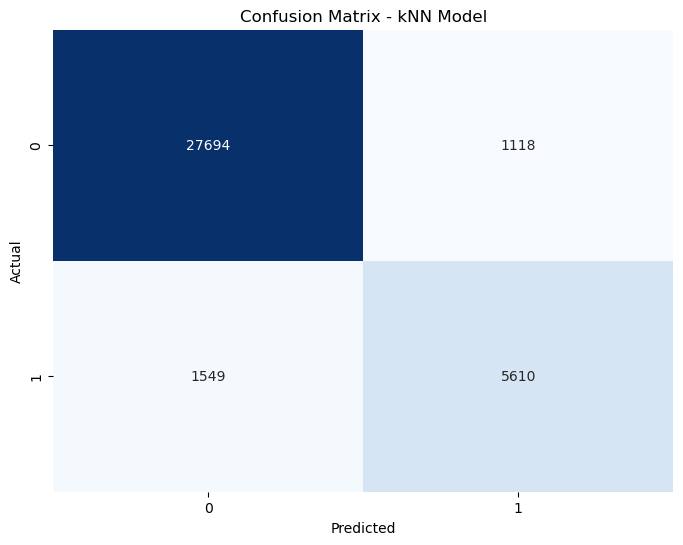

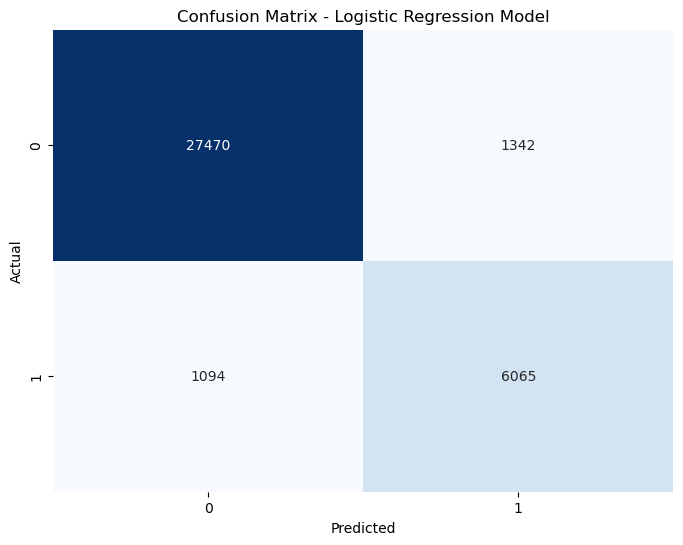

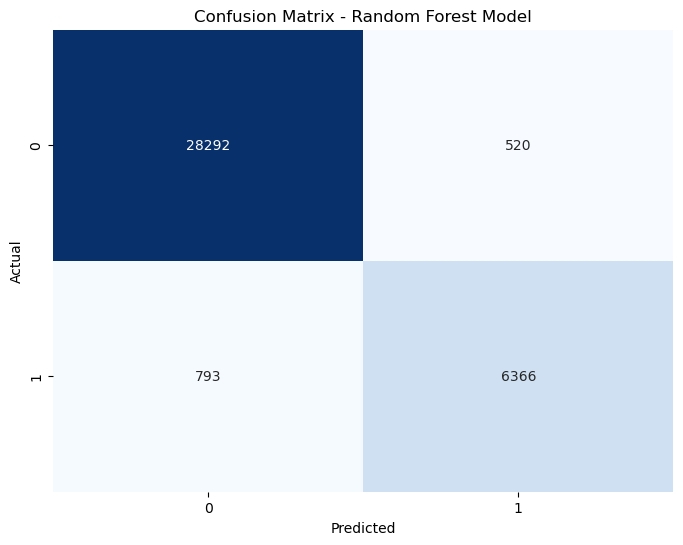

In [92]:
# Define function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', cbar=False)
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Plot confusion matrix for kNN model
plot_confusion_matrix(y_test, knn_pred, title='Confusion Matrix - kNN Model')

# Plot confusion matrix for Logistic Regression model
plot_confusion_matrix(y_test, lr_pred, title='Confusion Matrix - Logistic Regression Model')

# Plot confusion matrix for Random Forest model
plot_confusion_matrix(y_test, rf_pred, title='Confusion Matrix - Random Forest Model')

In [93]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import confusion_matrix

# Classification report for kNN model
print("Classification Report - kNN Model:")
print(classification_report(y_test, knn_pred))

# Classification report for Logistic Regression model
print("\nClassification Report - Logistic Regression Model:")
print(classification_report(y_test, lr_pred))   

# Classification report for Random Forest model
print("\nClassification Report - Random Forest Model:")
print(classification_report(y_test, rf_pred))

Classification Report - kNN Model:
              precision    recall  f1-score   support

           0       0.95      0.96      0.95     28812
           1       0.83      0.78      0.81      7159

    accuracy                           0.93     35971
   macro avg       0.89      0.87      0.88     35971
weighted avg       0.92      0.93      0.92     35971


Classification Report - Logistic Regression Model:
              precision    recall  f1-score   support

           0       0.96      0.95      0.96     28812
           1       0.82      0.85      0.83      7159

    accuracy                           0.93     35971
   macro avg       0.89      0.90      0.90     35971
weighted avg       0.93      0.93      0.93     35971


Classification Report - Random Forest Model:
              precision    recall  f1-score   support

           0       0.97      0.98      0.98     28812
           1       0.92      0.89      0.91      7159

    accuracy                           0.96     3

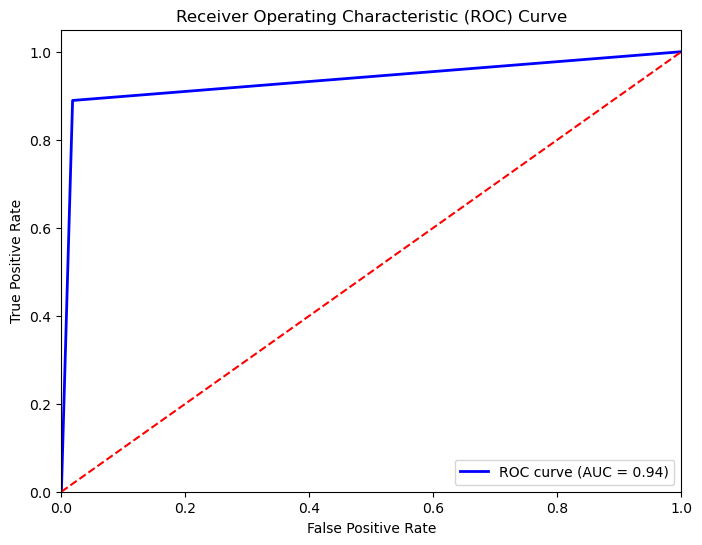

In [94]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, rf_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

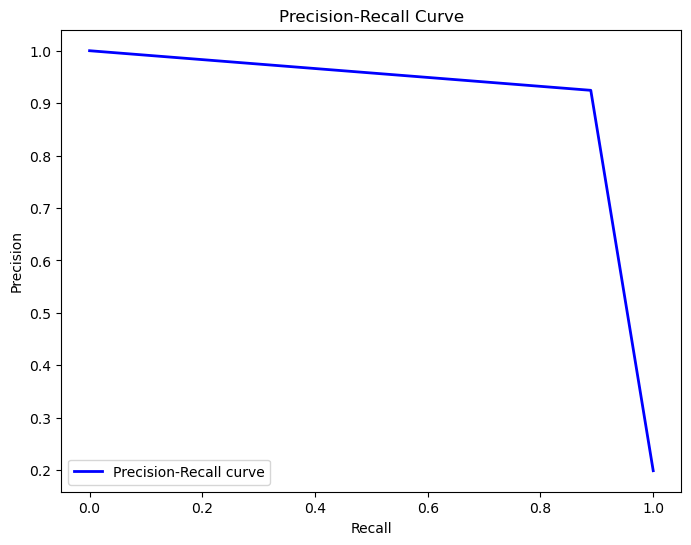

In [95]:
from sklearn.metrics import precision_recall_curve

# Calculate precision-recall curve
precision, recall, _ = precision_recall_curve(y_test, rf_pred)

# Plot precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.show()